In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
#loading the data
df = pd.read_csv(r'P:\ENGINEERING\FPO\Digitalisation\1 FPO Projects\IIX Data Analytics\02-General presentations\Knowledge folder - preparation\Data Science Learning Framework\Machine Learning Posters\5 - Unsupervised Learning\A320_input_data.csv')

In [3]:
#seeing summary of our data
df.head()

,gps_lat,gps_lon,take_off_weight,fuel_burn_total2,flight_time,cruise_time
0,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333
1,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333
2,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333
3,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333
4,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333


# K-Means Clustering

Text(0, 0.5, 'Latitude')

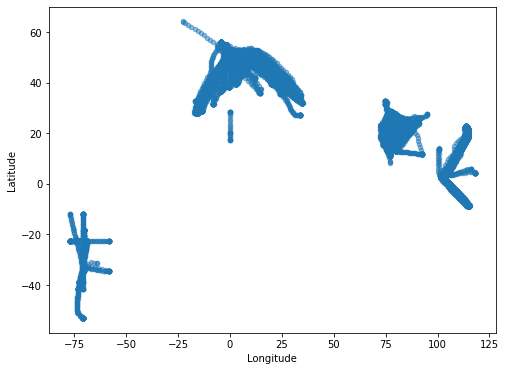

In [4]:
#plotting the data, as can be seen there are numerous clusters, which are different airline networks
plt.figure(figsize=(8,6))
plt.scatter(x=df["gps_lon"],y=df["gps_lat"], s=20, alpha = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [5]:
class Kmeans(object):
    
    def __init__(self, data, k=2):
        '''__init__ function to define the datapoints for clustering, and selecting random 
        data points as starting points for the centroids
        
        inputs: data: data to be clustered
                k: no. of clusters'''
        self.data = np.array(data) #incorporating the data into the object
        self.centroids = np.array([random.choice(self.data) for i in range(k)]) #assigning the centroid initialisations
        
    def train(self, train_its=50):
        '''function to move the clusters
        
        inputs: train_its: the number of iterations over which the cluster will be moved'''
        for iteration in range(train_its): #iterating through movement of clusters
            if float(iteration)*100/train_its % 5 == 0:
                print("{}% complete".format(np.round(float(iteration)*100/train_its)))
                
            self.assign_cluster() #assigning clusters
            self.move_centroid() #moving centroids
        
        self.cost = self.cost_function()
        
    def assign_cluster(self):
        '''algorithm to assign clusters to each datapoint, by assigning whichever centroid is closest to that cluster'''
        self.assigned_clusters = np.zeros(self.data.shape[0]) #creating empty array for cluster assignments
        self.assigned_cluster_pos = np.zeros((self.data.shape[0],2))
        for i, coord in enumerate(self.data): #iterating through data points
            #calculating distances to each centroid
            distances = np.array([np.linalg.norm(coord-centroid) for centroid in self.centroids])
            self.assigned_clusters[i] = np.argmin(distances) #assigning the cluster group to the centroid with the small distance
            self.assigned_cluster_pos[i] = self.centroids[np.argmin(distances)]
            
    def move_centroid(self):
        '''algorithm to move the centroids'''
        for i, centroid in enumerate(self.centroids): #iterating through centroids
            #moving centroid to average vector position of all datapoints assigned to that cluster
            self.centroids[i] = np.mean(self.data[self.assigned_clusters==i], axis=0)
        self.centroids = self.centroids[~np.isnan(self.centroids).any(axis=1)] #removing clusters which were assigned no points
        
    def cost_function(self):
        return (1/len(self.data))*np.sum(np.linalg.norm(self.data-self.assigned_cluster_pos, axis=1))

In [6]:
train_its = 50 #specifying number of training iterations
k = 4 #specifying number of clusters
clf = Kmeans(df[["gps_lon","gps_lat"]], k) #creating a clustering object, specifying the data to be clustered and the no. of clusters

In [7]:
clf.train(train_its) #performing k means

0.0% complete
10.0% complete
20.0% complete
30.0% complete
40.0% complete
50.0% complete
60.0% complete
70.0% complete
80.0% complete
90.0% complete


Text(0, 0.5, 'Latitude')

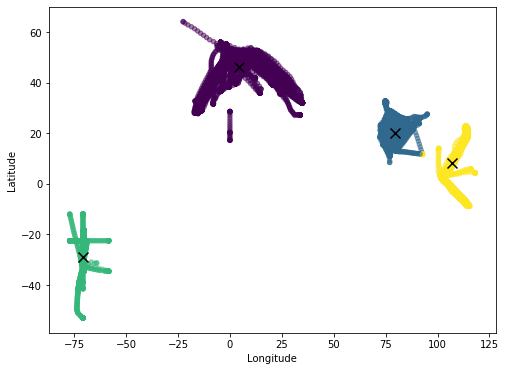

In [8]:
clf.move_centroid()
#plotting clusters
plt.figure(figsize=(8,6))
plt.scatter(x=clf.data[:,0], y=clf.data[:,1], c=clf.assigned_clusters, s=20, alpha =0.5)
plt.scatter(x=clf.centroids[:,0],y=clf.centroids[:,1], s=100 ,color='k', marker='x')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [9]:
df["airline"] = clf.assigned_clusters #adding clusters labels to the dataframe
df.head()

,gps_lat,gps_lon,take_off_weight,fuel_burn_total2,flight_time,cruise_time,airline
0,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333,2.0
1,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333,2.0
2,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333,2.0
3,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333,2.0
4,-22.49588,-73.097702,65.770607,4662.924805,1.5,0.333333,2.0


# Principal Component Analysis (PCA)

Text(0, 0.5, 'Flight Time (hrs)')

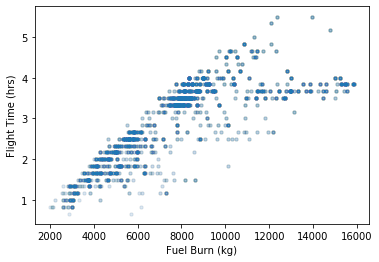

In [10]:
#plotting data on which to perform pca, as can be seen they have a good correlation so PCA is appropriate
plt.scatter(df["fuel_burn_total2"],df["flight_time"], s=10, alpha=0.01)
plt.xlabel("Fuel Burn (kg)")
plt.ylabel("Flight Time (hrs)")

In [11]:
#data we want to apply PCA to 71
df[["fuel_burn_total2","flight_time"]].sample(5).apply(lambda x: np.round(x))

,fuel_burn_total2,flight_time
4614,9888.0,4.0
4368,3066.0,1.0
16727,8020.0,3.0
20136,4155.0,2.0
3664,5461.0,2.0


In [12]:
#creating separate dataframe of columns to be combined, additional numerical columns can be added to this!
pca_df = df[["fuel_burn_total2","flight_time"]].copy() # "take_off_weight","cruise_time"
for column in pca_df.columns:
    #normalising the data
    pca_df[column] = (pca_df[column] - np.mean(pca_df[column]))/(max(pca_df[column])-min(pca_df[column]))
pca_arr = np.array(pca_df) #converting to numpy array

In [13]:
#calculating sigma (covariance matrix)
sigma = (1/len(pca_df))*np.sum(np.array([np.dot(i[:,np.newaxis],i[:,np.newaxis].transpose()) for i in pca_arr]),axis=0)

In [14]:
principal_components = np.linalg.eig(sigma)[1] #taking eigenvectors (principal components) from sigma

principal_components #the principal components

array([[ 0.74598689, -0.66596063],
       [ 0.66596063,  0.74598689]])

Text(0, 0.5, 'Flight Time (hrs)')

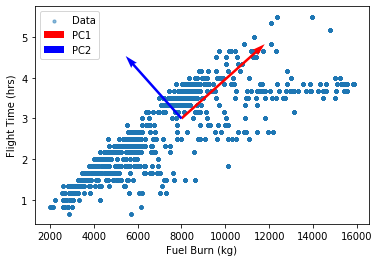

In [15]:
#plotting the principal components over the data
plt.scatter(x=df["fuel_burn_total2"], y=df["flight_time"], s=10, alpha=0.5)
plt.quiver([8000], [3], principal_components[0,0],principal_components[1,0], color=['r'], scale=3)
plt.quiver([8000], [3], principal_components[0,1],principal_components[1,1], color=['b'], scale=4)
plt.legend(["Data","PC1","PC2"])
plt.xlabel("Fuel Burn (kg)")
plt.ylabel("Flight Time (hrs)")
#principal component 1 represents most variation in the data, followed by PC2... and so on

In [16]:
#compressing data into 1,2,3... principal components to assess how much accuracy is lost with each component not used
for i in range(principal_components.shape[1]): #iterating through number of principal components
    z = np.dot(principal_components.transpose()[0:i+1,:], pca_df.transpose()).transpose() #calculating z

    #calculating projection error
    sqr_proj_err = np.mean(np.linalg.norm(pca_arr-np.dot(principal_components[:,0:i+1], z.transpose()).transpose(), axis=1))/ \
    np.mean(np.linalg.norm(pca_arr, axis=1))
    
    print("Projection error for {} principal components: {}".format(i+1,np.round(sqr_proj_err,3)))

Projection error for 1 principal components: 0.293
Projection error for 2 principal components: 0.0


In [17]:
#Dimensionless values
pd.DataFrame({"Z1":z[:,0],"Z2":z[:,1]}).sample(5)

,Z1,Z2
14192,0.110335,0.100948
19731,-0.403171,0.004675
5606,0.130373,0.129283
9644,0.287468,0.081489
16006,0.309264,-0.076642
